<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 5 - Unsupervised Learning - K-Means Clustering with Principal Component Analysis</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement two K-Means clustering models- with and without the use of Principal Component Analysis (PCA)**



**Guidelines**
* Download `WineData.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 5 - Unsupervised Learning - K-Means Clustering with Principal Component Analysis (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

#### Read the content of the `WineData.csv` file into a dataset and perform the following:

> **Q1.1.** Visualize the dataset

> **Q1.2.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.3.** Build a clustering model using K-Means clustering algorithm to segment the wines based on all columns in the dataset.  

> **Q1.4.** Based on the clustering on Q1.3, describe some characteristics of each cluster

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [242]:
wine_dataset = pd.read_csv('WineData.csv')
print(wine_dataset.head(6))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             

In [243]:
print(wine_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [244]:
print(wine_dataset.isna().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [245]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# If df is not defined, define it using your actual dataset

# Check for duplicate rows
duplicate_rows = wine_dataset.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows > 0:
    print("The dataset has duplicate rows.")
    print("Number of duplicate rows:", num_duplicate_rows)
else:
    print("The dataset does not have any duplicate rows.")


The dataset does not have any duplicate rows.


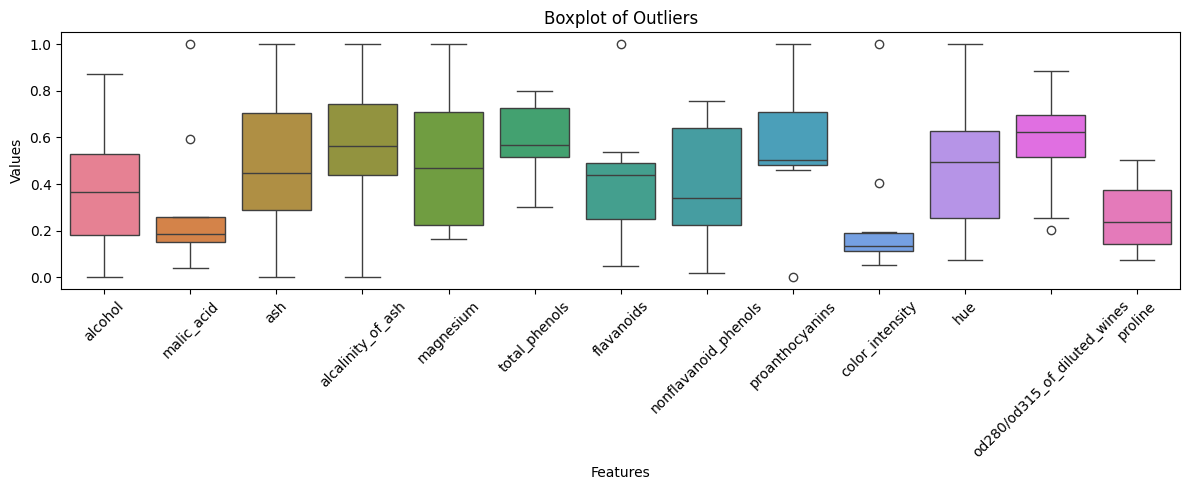

Outlier rows: 10


In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


# 1. Normalize dataset using MinMaxScaler
scaler = MinMaxScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(wine_dataset), columns=wine_dataset.columns)

# 2. Find outliers using scipy z score
z_scores = zscore(dataset_normalized)

# Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# 3. Visualize outliers using box plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=dataset_normalized[outliers.any(axis=1)])
plt.title('Boxplot of Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# 4. Remove outliers and update the dataset
dataset_cleaned = dataset_normalized[~outliers.any(axis=1)]

print("Outlier rows:",wine_dataset[outliers.any(axis=1)].shape[0])


# 5. Apply inverse_transform to inverse the normalization
wine_dataset = pd.DataFrame(scaler.inverse_transform(dataset_cleaned), columns=dataset_cleaned.columns)


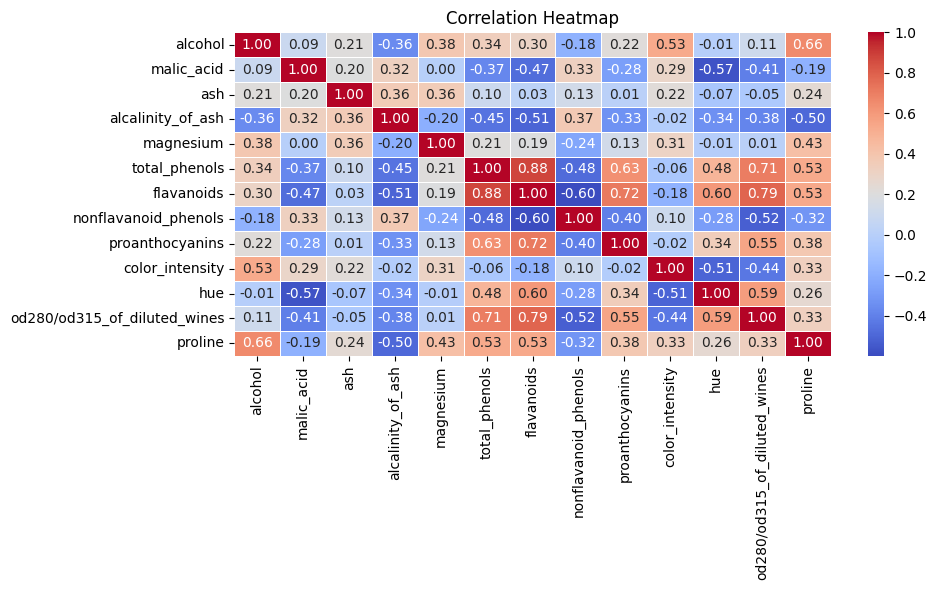

In [247]:
corr_matrix = wine_dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [248]:
# sns.pairplot(wine_dataset)

In [249]:
scaler = StandardScaler()
wine_dataset_scaled = scaler.fit_transform(wine_dataset)

In [250]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42, n_components=3)
pca.fit_transform(wine_dataset_scaled)

array([[ 3.48060917e+00, -1.56858902e+00,  6.35114478e-02],
       [ 2.38812414e+00,  3.37493718e-01, -1.88645785e+00],
       [ 2.62450615e+00, -9.30060272e-01,  1.22332979e+00],
       [ 3.89476889e+00, -2.69558037e+00,  4.09860654e-02],
       [ 1.01328498e+00, -9.86125688e-01,  2.41258268e+00],
       [ 3.23046581e+00, -2.10808321e+00, -3.64647550e-01],
       [ 2.63277007e+00, -1.06677759e+00, -6.49340206e-01],
       [ 2.12000255e+00, -1.73510629e+00,  6.37590492e-01],
       [ 2.75249653e+00, -8.00083776e-01, -1.64803237e+00],
       [ 2.89989895e+00, -6.59400420e-01, -9.27828795e-01],
       [ 3.62088436e+00, -1.18758713e+00, -1.67058321e-01],
       [ 1.89500573e+00, -5.05497159e-01, -8.59849233e-01],
       [ 2.26231419e+00, -5.08308136e-01, -5.72413226e-01],
       [ 3.79527551e+00, -9.45817830e-01, -1.03046328e+00],
       [ 4.62147857e+00, -1.98182972e+00, -1.04906963e+00],
       [ 2.40367852e+00, -1.72174168e+00,  7.06290616e-01],
       [ 2.26162859e+00, -2.39147528e+00

In [251]:
pca.n_components_

3

In [252]:
pca.explained_variance_ratio_

array([0.38821312, 0.20119992, 0.09573506])

In [253]:
pca.get_covariance()

array([[ 1.03478559,  0.04387444,  0.20446291, -0.34780193,  0.46037457,
         0.33173301,  0.29173074, -0.22987398,  0.25707285,  0.49545195,
        -0.05668524,  0.07829369,  0.59071998],
       [ 0.04387444,  0.82918341,  0.22401897,  0.33238743,  0.07225443,
        -0.40931702, -0.48890987,  0.35018127, -0.34820815,  0.3473487 ,
        -0.46822116, -0.5019878 , -0.14106464],
       [ 0.20446291,  0.22401897,  1.05228837,  0.30802084,  0.32714541,
         0.09057854,  0.02165967,  0.08978546,  0.05454975,  0.22485846,
        -0.10628686, -0.04878262,  0.18898481],
       [-0.34780193,  0.33238743,  0.30802084,  1.03820737, -0.14209559,
        -0.45416266, -0.50672255,  0.43348611, -0.37863621, -0.05698496,
        -0.29212806, -0.38660652, -0.44184881],
       [ 0.46037457,  0.07225443,  0.32714541, -0.14209559,  0.80778141,
         0.27045054,  0.22785663, -0.14135298,  0.20661672,  0.36418259,
        -0.03742166,  0.06986689,  0.44814127],
       [ 0.33173301, -0.409317

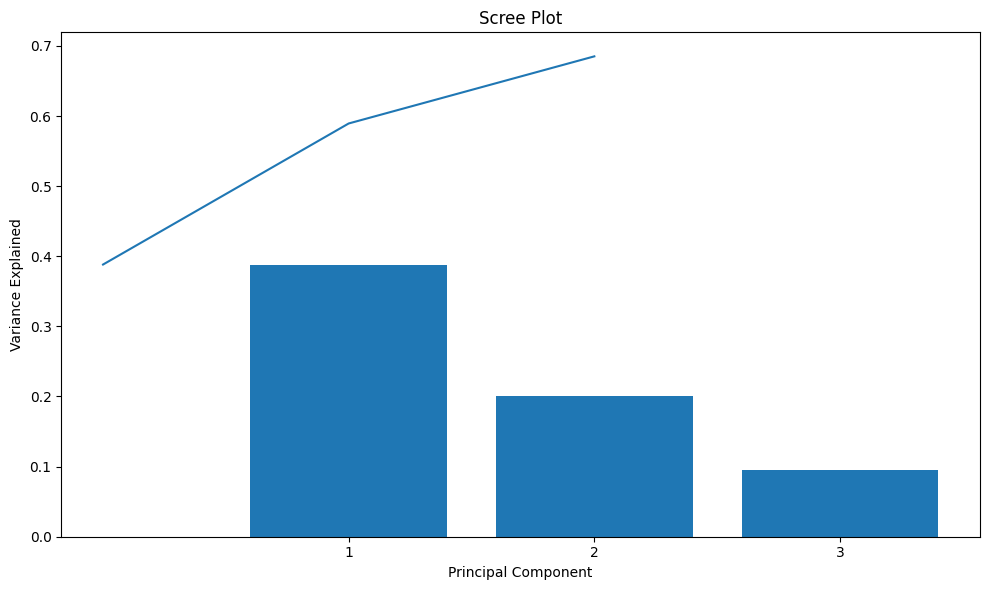

In [254]:
# Scree plot: Cumulative Explained Variance
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xticks(range(1, pca.n_components_+1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [255]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

# Choose the number of components that capture a specified percentage of variance
target_variance = 0.66  # Set your desired percentage here (e.g., 0.95 or 0.99)
num_components = np.argmax(cumulative_variance >= target_variance) + 1
print(num_components)
print(f'The number of components to capture {target_variance * 100}% variance: {num_components}')



[0.38821312 0.58941304 0.6851481 ]
3
The number of components to capture 66.0% variance: 3


In [256]:
# Use the selected number of components for further analysis or dimensionality reduction
final_pca = PCA(n_components=num_components,random_state=42)
wine_dataset_pca = final_pca.fit_transform(wine_dataset_scaled)

In [258]:
components = final_pca.components_.T
print(components)
reduced_df_pca_columns = ['PC'+str(item) for item in range(0,num_components)]
reduced_df = pd.DataFrame(wine_dataset_pca, columns=reduced_df_pca_columns)
reduced_df

[[ 0.16996613 -0.45853938 -0.16028328]
 [-0.24497929 -0.24423437  0.07750553]
 [-0.01067751 -0.30436753  0.71900652]
 [-0.28335466  0.04930361  0.54161307]
 [ 0.12208566 -0.37477018  0.13250609]
 [ 0.3860955  -0.04285214  0.13384635]
 [ 0.42049074  0.02755385  0.10133238]
 [-0.29265027 -0.01621397  0.10635589]
 [ 0.31843905 -0.01734879  0.09714934]
 [-0.07163309 -0.51491091 -0.20947799]
 [ 0.29243455  0.26449193  0.14393281]
 [ 0.36086442  0.18378004  0.15450719]
 [ 0.28633141 -0.35006336 -0.05501255]]


,PC0,PC1,PC2
0,3.480609,-1.568589,0.063511
1,2.388124,0.337494,-1.886458
2,2.624506,-0.930060,1.223330
3,3.894769,-2.695580,0.040986
4,1.013285,-0.986126,2.412583
...,...,...,...
163,-3.316671,-2.279458,-0.361216
164,-2.586142,-1.816071,0.239916
165,-2.592466,-3.012122,-1.112428
166,-2.301303,-2.507022,-0.664556


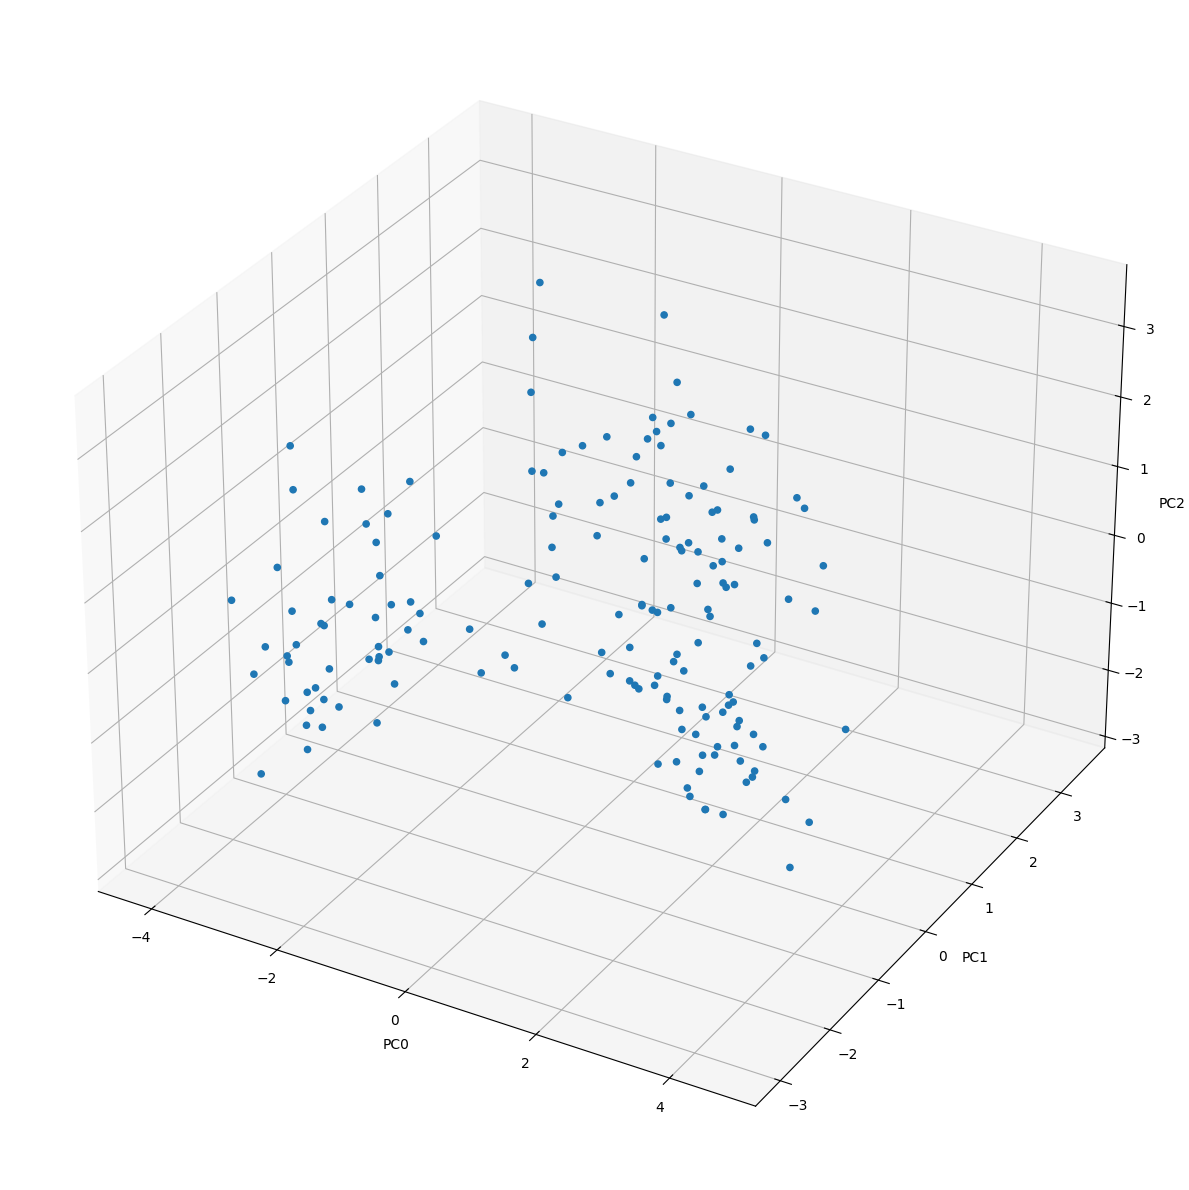

In [259]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_df.iloc[:, 0], reduced_df.iloc[:, 1], reduced_df.iloc[:, 2],alpha=1)
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
plt.show()


In [260]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [261]:
variations = []
range_n_clusters = range(1,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(reduced_df)
    variations.append(kmeans.inertia_)

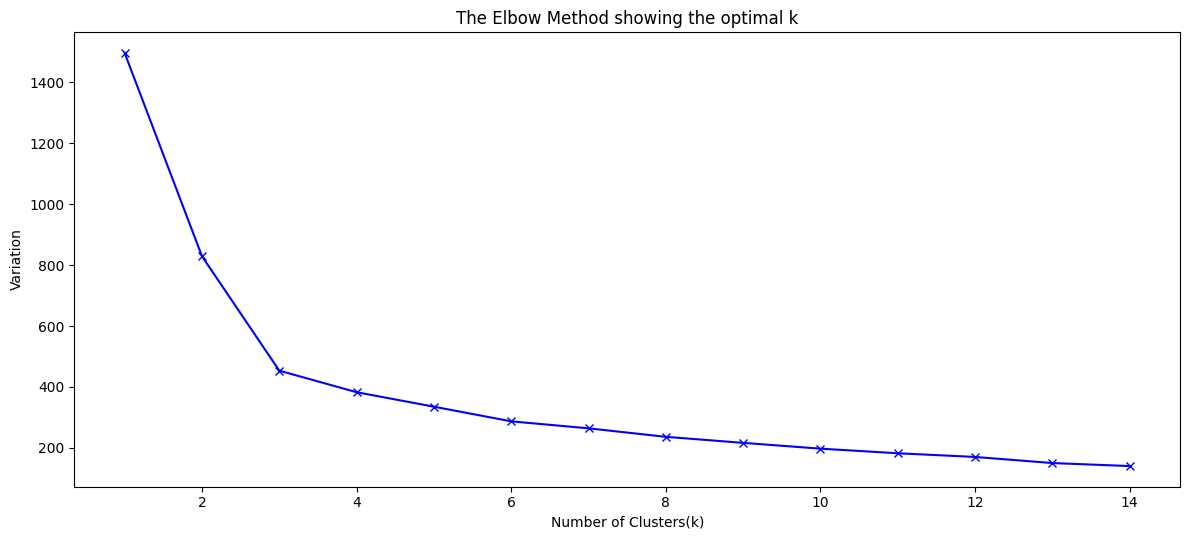

In [262]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [263]:

range_n_clusters = range(2,15)

optimal_num_clusters = 0
max_silhouette_score = 0

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(reduced_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(reduced_df, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters=num_clusters
    
print("Optimal number of clusters = {}".format(optimal_num_clusters))
    



For n_clusters=2, the silhouette score is 0.40038215517212755
For n_clusters=3, the silhouette score is 0.470992063020188
For n_clusters=4, the silhouette score is 0.4176833356722624
For n_clusters=5, the silhouette score is 0.30423062124194383
For n_clusters=6, the silhouette score is 0.33643794663369087
For n_clusters=7, the silhouette score is 0.29942198556872257
For n_clusters=8, the silhouette score is 0.30424143363816725
For n_clusters=9, the silhouette score is 0.3204397434165029
For n_clusters=10, the silhouette score is 0.294914671370887
For n_clusters=11, the silhouette score is 0.3173266859850597
For n_clusters=12, the silhouette score is 0.27609809274520486
For n_clusters=13, the silhouette score is 0.293660037625781
For n_clusters=14, the silhouette score is 0.31189045967208123
Optimal number of clusters = 3


In [264]:
kmeans = KMeans(n_clusters=optimal_num_clusters, max_iter=50)
kmeans.fit(reduced_df)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [265]:
print(reduced_df)

          PC0       PC1       PC2
0    3.480609 -1.568589  0.063511
1    2.388124  0.337494 -1.886458
2    2.624506 -0.930060  1.223330
3    3.894769 -2.695580  0.040986
4    1.013285 -0.986126  2.412583
..        ...       ...       ...
163 -3.316671 -2.279458 -0.361216
164 -2.586142 -1.816071  0.239916
165 -2.592466 -3.012122 -1.112428
166 -2.301303 -2.507022 -0.664556
167 -3.195190 -2.763159  1.034124

[168 rows x 3 columns]


In [266]:
reduced_df['km_clusters'] = kmeans.labels_

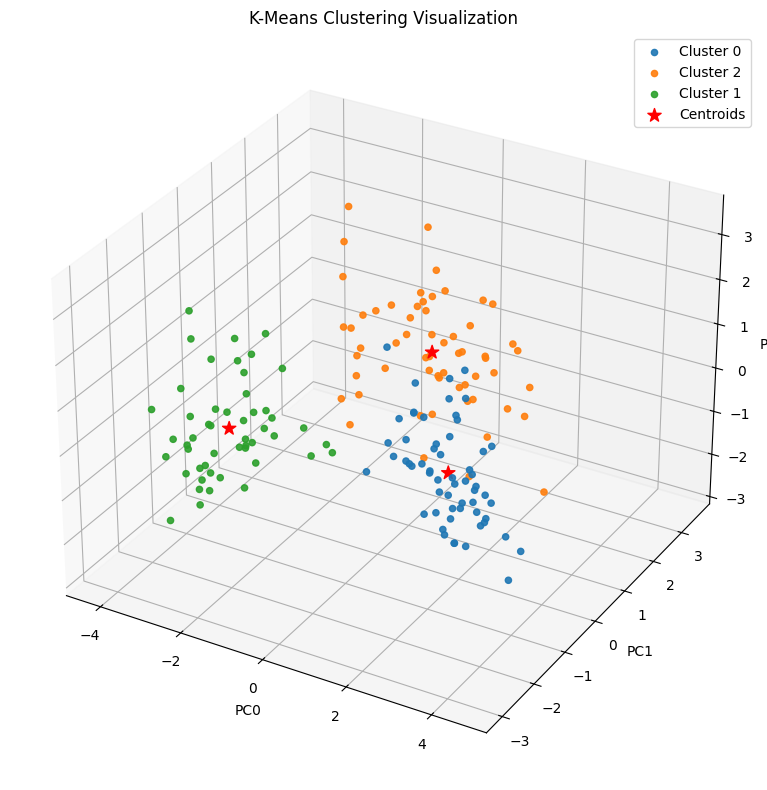

In [284]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming 'reduced_df' contains the reduced_df with columns: PC0, PC1, PC2, km_clusters

# Create a new figure for the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with hue
for cluster in reduced_df['km_clusters'].unique():
    subset = reduced_df[reduced_df['km_clusters'] == cluster]
    ax.scatter(subset['PC0'], subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.9)

# Calculate centroids
centroids = reduced_df.groupby('km_clusters').mean()

# Plot centroids
ax.scatter(centroids['PC0'], centroids['PC1'], centroids['PC2'], c='red', marker='*', alpha=1, s=100, label='Centroids')

# Add labels and title
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
plt.title('K-Means Clustering Visualization')

# Add legend
ax.legend()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

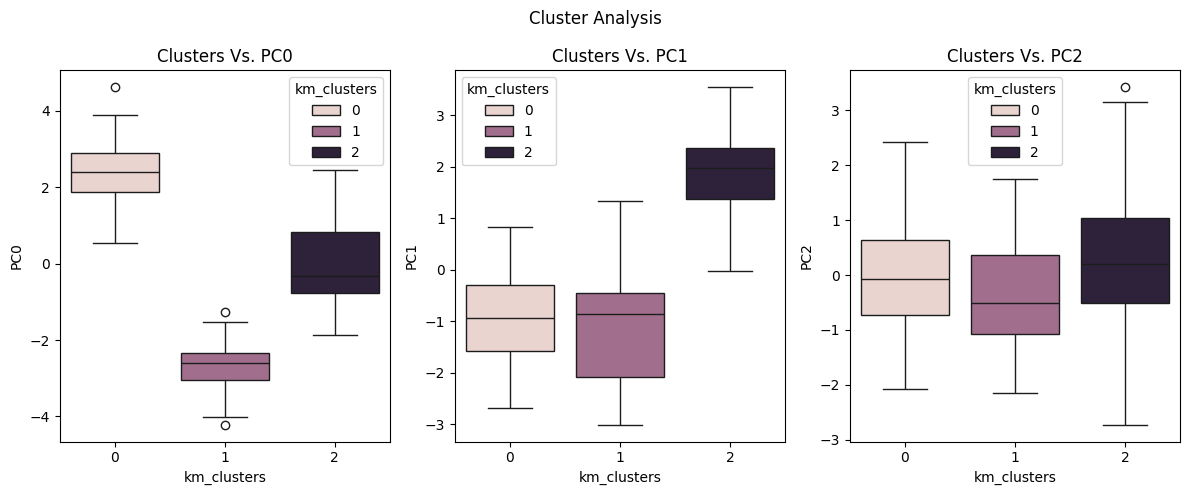

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Define the columns for which to create boxplots
columns = ['PC'+str(item) for item in range(0, num_components)]


# Iterate over the columns and create boxplots
for i, column in enumerate(columns, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='km_clusters', y=column, data=reduced_df, hue ='km_clusters')
    plt.title(f'Clusters Vs. {column}')

# Add a title for the entire plot
plt.suptitle('Cluster Analysis')

# Adjust layout and display the plot
plt.tight_layout()
plt.show



In [269]:
# Q1.1. Visualize the dataset
???

Object `?` not found.


In [270]:
# Q1.2. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability
???

Object `?` not found.


In [271]:
# Q1.3. Build a clustering model using K-Means clustering algorithm to segment the wines based on all columns in the dataset.
???

Object `?` not found.


In [272]:
# Q1.4. Based on the clustering on Q1.3, describe some characteristics of each cluster
???

Object `?` not found.


# Question 2: Hierarchical Clustering 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `WineData.csv` file into a dataset and perform the following:

> **Q2.1.** Using PCA, reduce the dimensionality of the dataset into the appropriate number of components

> **Q2.2.** Build a clustering model using K-Means clustering algorithm to segment the wines based on principal components obtained in Q2.1.  

> **Q2.3.** Based on the clustering on Q2.2, describe some characteristics of each cluster

In [273]:
# Q2.1. Using PCA, reduce the dimensionality of the dataset into the appropriate number of components
???

Object `?` not found.


In [274]:
# Q2.2. Build a clustering model using K-Means clustering algorithm to segment the wines based on principal components obtained in Q2.1.
???

Object `?` not found.


In [275]:
# Q2.3. Based on the clustering on Q2.2, describe some characteristics of each cluster
???

Object `?` not found.


<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

???

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab5.ipynb** to the **Lab 5 - Unsupervised Learning - K-Means Clustering with Principal Component Analysis (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                               | Good                                                  | Average                                                | Below Average                                          | Poor                                                  | No Attempt                                            |
| ----------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection             |
